In [8]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
#Read the data and preliminary exploration
data = pd.read_csv('/Users/computer/Documents/framinghamHeart/framingham_heart_disease.csv')
print(data.info())
print("\n")
print(data.isnull().sum())
#Drop columns with more than 100 missing values
data.drop(['education','totChol','glucose'],axis = 1,inplace = True)
data.rename(columns = {'male':'gender'},inplace = True)
#Replace the missing values in cigarettes with 14, which is the average number smoked across the US
data['cigsPerDay'] = data['cigsPerDay'].fillna(14)
data['BPMeds'] = data['BPMeds'].fillna(0)
data['heartRate'] = data['heartRate'].fillna(80) #Average
data['BMI'] = data['BMI'].fillna(29.4) #Average BMI in the US
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


male  

In [11]:
labels = data['TenYearCHD']
x_train = data.copy()
x_train.drop(columns = ['TenYearCHD'],inplace = True)
print(y_train.shape)
print(x_train.shape)
print("\n")
print(x_train.info())
print(x_train.isnull().sum())
#del data,labels #Free up some memory

(3178,)
(4238, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4238 non-null   float64
 11  heartRate        4238 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 397.4 KB
None
gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sys

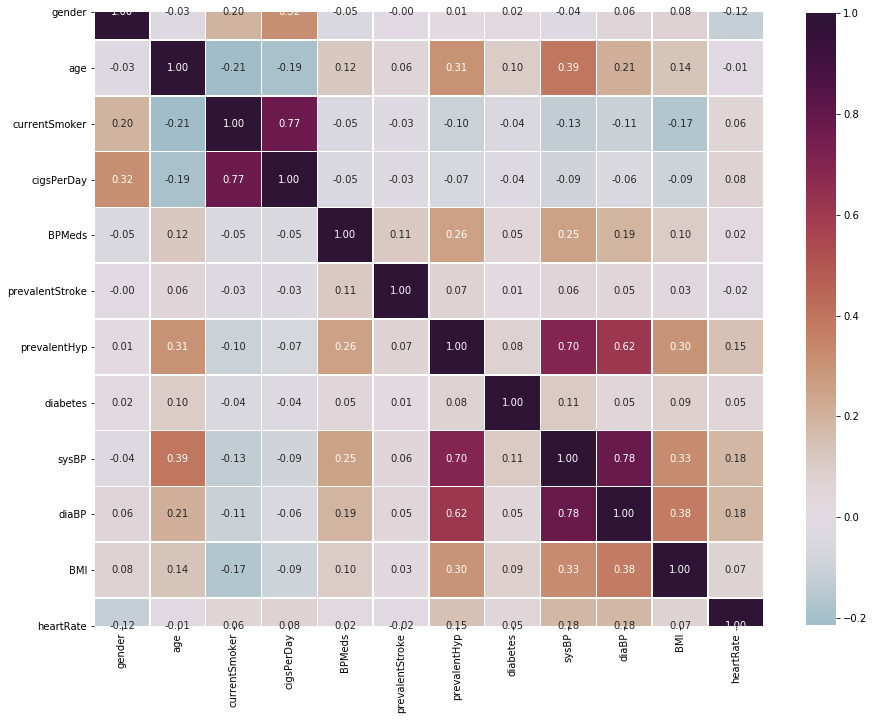

(3178, 12)
(3178,)
(1060, 12)
(1060,)


In [13]:
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns 
#Look at a heat map of various features 
correlations = x_train.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',cmap = 'twilight_shifted',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
plt.show()
x_train,x_test,y_train,y_test = train_test_split(np.asarray(x_train),np.asarray(labels),test_size = 0.25,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

GaussianNB trained on 3178 samples.
RandomForestClassifier trained on 3178 samples.
LogisticRegression trained on 3178 samples.


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier trained on 3178 samples.
[0.29411764705882354, 0.24999999999999997, 0.18867924528301885, 0.23897058823529416]
[0.0038001537322998047, 0.36289405822753906, 0.054755210876464844, 0.42243003845214844]
[0.8245283018867925, 0.8528301886792453, 0.8575471698113207, 0.8528301886792453]
['GaussianNB', 'RandomForest', 'LogisticRegression', 'GradientBoosting']


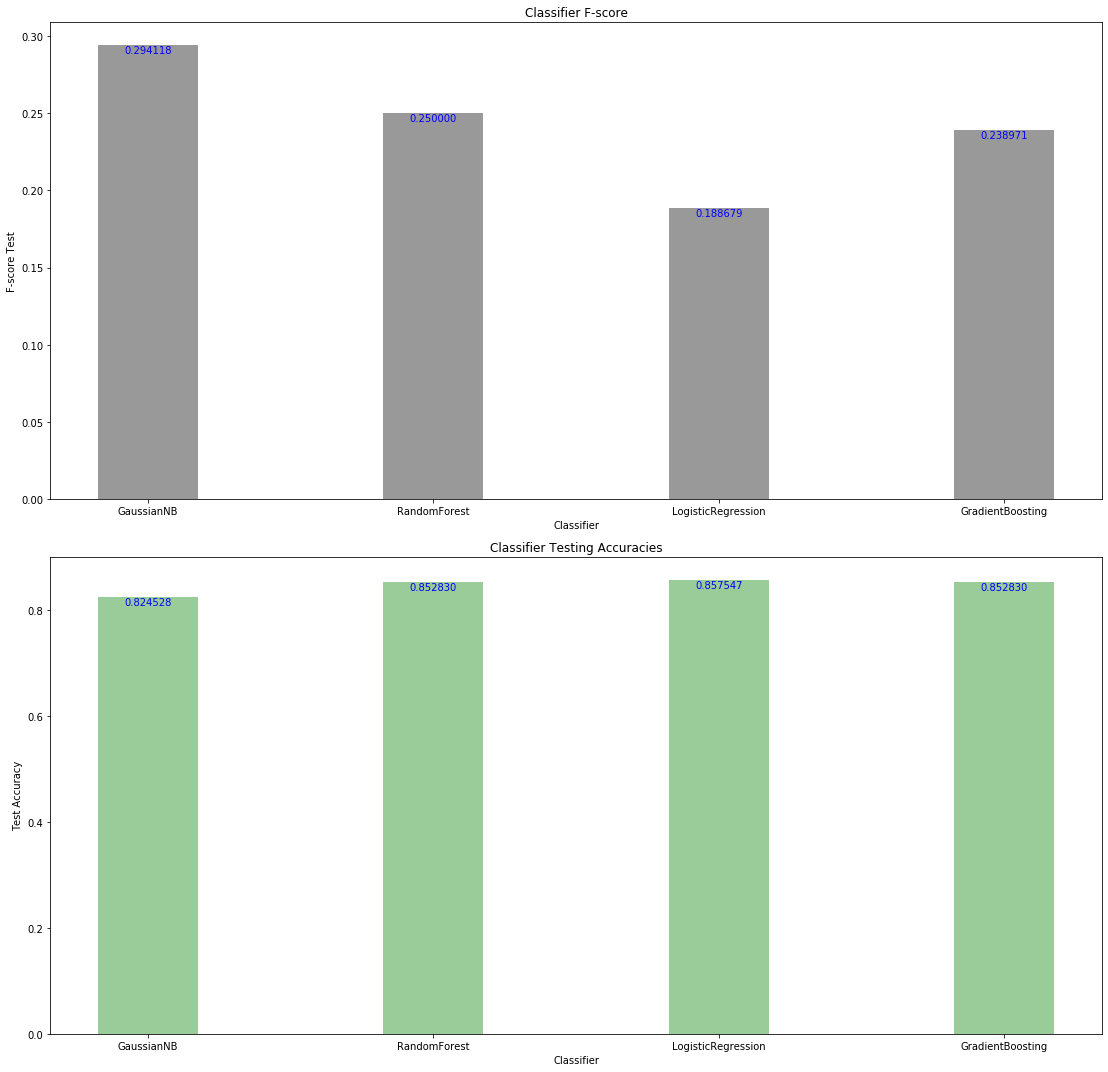

In [14]:
#Import a few models
from time import time
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score,accuracy_score

gnb = GaussianNB()
rfc = RandomForestClassifier(random_state=42, n_jobs=2)
lreg = LogisticRegression(random_state=42)
gdb = GradientBoostingClassifier(random_state=42)
classifiersList = [gnb,rfc,lreg,gdb]
classifiersScores = []
classifiersTrainTimes = []
def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    #Training the model 
    start = time()
    learner = model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = learner.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_train'] = accuracy_score(y_train[:300],learner.predict(x_train[:300]))
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    return results

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []
clf_trainAccuracies = []

for model in classifiersList:
    #Train the various models on the same set of data to compare and choose the best model
    clfResults = trainPredict(model,len(y_train),x_train,y_train,x_test,y_test)
    clf_lscores.append(clfResults['f_test'])
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_trainAccuracies.append(clfResults['acc_train'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_lscores)
print(clf_ltrain_times)
print(clf_testAccuracies)
print(clf_lnames)

#Plot the results using the metrics obtained 
plt.figure(1,figsize = (45,15))
nGroups = len(clf_lscores)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_lscores
data2 = clf_testAccuracies 
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('F-score Test')
plt.title('Classifier F-score')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Classifier Testing Accuracies')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()

In [15]:
#Tune a model
#Choose Random Forest Classifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state=42, n_jobs=2)
parameters = {'max_depth': [4,6,8,10,12], 'n_estimators': [200, 250, 300]}
scorer = make_scorer(fbeta_score,beta=0.5)

grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

#Fit the grid object using fit(), training data and the optimal parameters
grid_fit = grid_obj.fit(x_train,y_train)

#Get the estimator 
best_clf = grid_fit.best_estimator_

#Predictions using both the unoptimized and the optimized model 
predsUnoptimized = (clf.fit(x_train, y_train)).predict(x_test)
predsOptimized = best_clf.predict(x_test)

#Best fit parameters
print("Best gridsearch parameters\n------")
print(grid_fit.best_params_)

#Report the change in accuracies 
print("Unoptimized model characteristics\n-----")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predsUnoptimized)*100))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predsUnoptimized, beta = 0.5)))
print("\nOptimized model characteristics\n-----")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predsOptimized)*100))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predsOptimized, beta = 0.5)))

Best gridsearch parameters
------
{'max_depth': 12, 'n_estimators': 250}
Unoptimized model characteristics
-----
Accuracy score on testing data: 85.2830
F-score on testing data: 0.2500

Optimized model characteristics
-----
Accuracy score on testing data: 86.0377
F-score on testing data: 0.2455


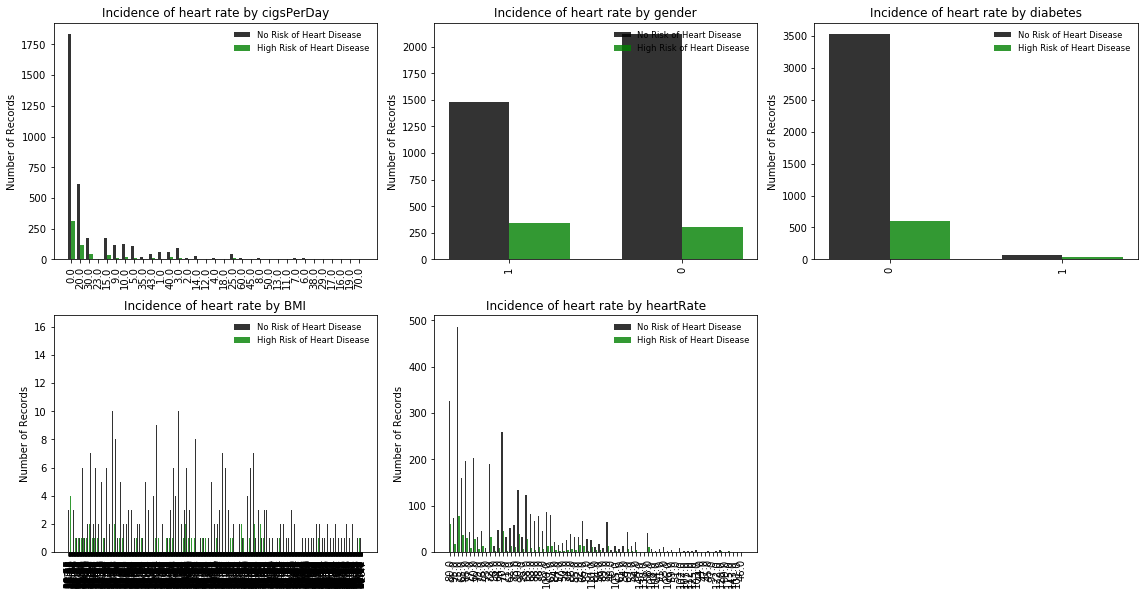

In [17]:
#Next step is looking at a subset of features which exert pressure on the prediction process
#To be continued and updated later. 
subFeatures = ['cigsPerDay' ,'gender', 'diabetes', 'BMI', 'heartRate']
plt.figure(1,figsize = (16,16))
plot_num = 1
nrows = 4
ncols = 3
for feat in subFeatures:
    groups = data[feat].unique()
    geLems = len(groups)
    noRisk = [0]*geLems #LESS THAN 50
    highRisk = [0]*geLems #MORE THAN 50
    for ocn in range(len(groups)):
        for row in range(len(data)):
            if data[feat][row] == groups[ocn] and labels[row] == 1:
                highRisk[ocn] += 1
            elif data[feat][row] == groups[ocn] and labels[row] == 0:
                noRisk[ocn] += 1
    # create subplots for Cigarettes per day, gender, diabetes,Body Mass Index and Heart Rate
    plt.subplot(nrows, ncols, plot_num)
    index = np.arange(geLems)
    barWidth = 0.35
    opacity = 0.8
    rects1 = plt.bar(index, noRisk, barWidth, alpha=opacity, color='k', label='No Risk of Heart Disease')
    rects2 = plt.bar(index + barWidth, highRisk, barWidth, alpha=opacity, color='g', label='High Risk of Heart Disease')
    plt.ylabel("Number of Records")
    plt.title("Incidence of heart rate by {}".format(feat))
    plt.xticks(index + barWidth / 2.0, groups, rotation='vertical')
    plt.legend(frameon=False, loc='upper right', fontsize='small')
    plot_num += 1
plt.tight_layout()
plt.show()